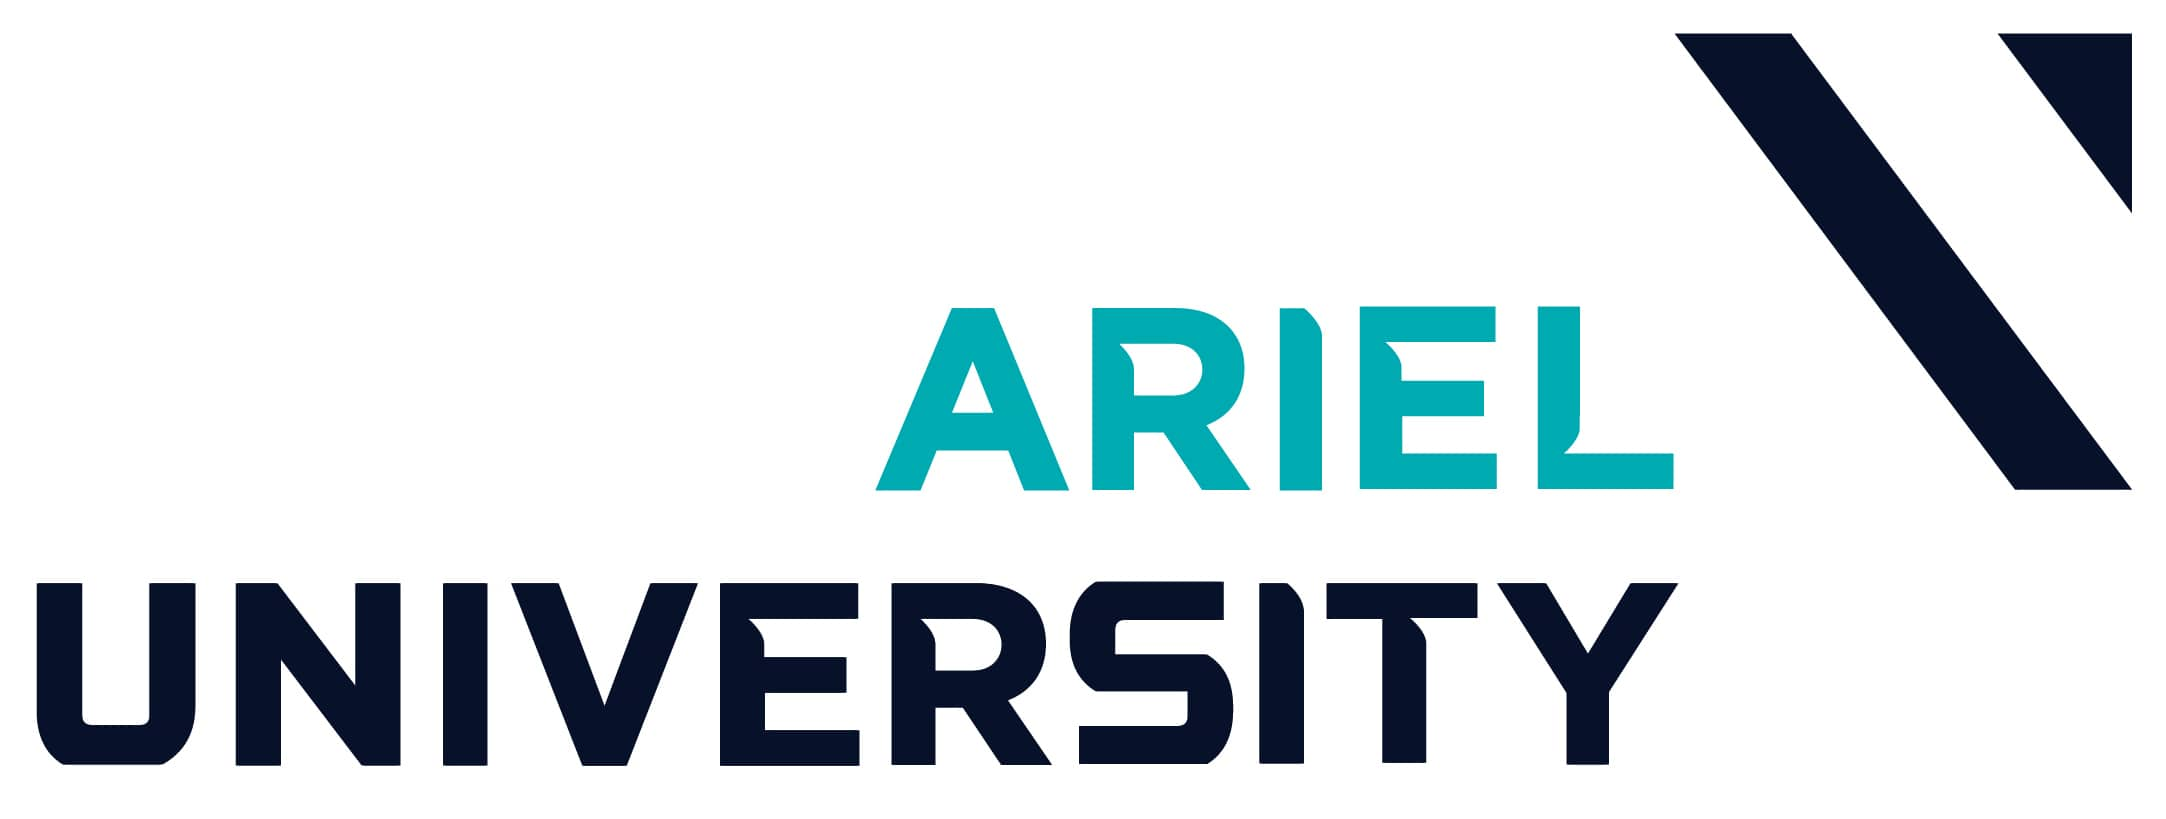

In [68]:
from IPython import display
from IPython.display import HTML, Image
display.Image("https://www.ariel.ac.il/sites/Navon-Venezia/img/Ariel_U_logo2.jpg")

#### Group Number - 19

#### Presented by:


* Leor Neuman
* 
* 

#### Source: 
kaggle: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [109]:
df=pd.read_csv('https://raw.githubusercontent.com/hhneuman/Data-Analisys/main/Sleep_health_and_lifestyle_dataset.csv')
sleep_df=df.copy()

## About the Data
#### The Sleep Health and Lifestyle Dataset covers a wide rande of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

In [110]:
sleep_df.info()
sleep_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


(374, 13)

In [111]:
sleep_df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Rearranging the data:

In [112]:
sleep_df=sleep_df.rename(columns={"Person ID": "Person_ID",
                         "Sleep Duration": "Sleep_Duration",
                         'Quality of Sleep': 'Quality_of_Sleep',
                         'Physical Activity Level': 'Physical_Activity_Level',
                         'Stress Level': 'Stress_Level', 
                         'BMI Category': 'BMI_Category', 
                         'Blood Pressure': 'Blood_Pressure',
                         'Heart Rate': 'Heart_Rate',
                         'Daily Steps': 'Daily_Steps',
                         'Sleep Disorder': 'Sleep_Disorder'})

Making the columns readable.

In [113]:
sleep_df['BMI_Category']=sleep_df['BMI_Category'].replace('Normal Weight','Normal')

Fixing values that indicate the same value.

In [114]:
sleep_df["High_Pressure"] = 0
sleep_df["Low_Pressure"] = 0

for i, val in enumerate(sleep_df["Blood_Pressure"]):
    j = 0    
    while val[j] != "/":
        j += 1
        continue
        
    sleep_df.loc[i, "High_Pressure"] = int(val[:j])
    sleep_df.loc[i, "Low_Pressure"] = int(val[(j+1):])
    
sleep_df.drop(columns='Blood_Pressure', inplace=True)

Spliting "Blood Pressure" into seperate columns.

In [99]:
sleep_df.head(5)

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,High_Pressure,Low_Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


### Correlations
#### We decided to first look for correlations in the data to determine what should we investigate further.

In [115]:
corr_df=sleep_df.copy()

In [116]:
corr_df['BMI_Category']=corr_df['BMI_Category'].replace(['Normal','Overweight','Obese'],[1,2,3])
corr_df['Sleep_Disorder']=corr_df['Sleep_Disorder'].replace(['None','Insomnia','Sleep Apnea'],[1,2,3])

We created a new dataframe and renamed the verbal data into numeral values so it will register inside the correlation matrix.

<AxesSubplot:>

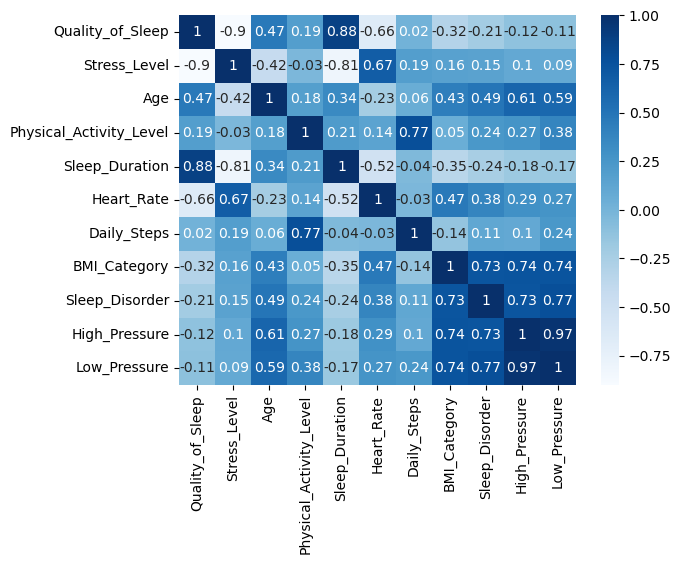

In [117]:
features=['Quality_of_Sleep','Stress_Level','Age','Physical_Activity_Level','Sleep_Duration','Heart_Rate','Daily_Steps','BMI_Category','Sleep_Disorder','High_Pressure','Low_Pressure']
correlation_matrix = corr_df[features].corr().round(2)
sns.heatmap(data=correlation_matrix,cmap='Blues', annot=True)

In [118]:
#disorder_df=sleep_df['Sleep_Disorder']
#disorder_df=disorder_df.value_counts().to_frame()
#insomnia= disorder_df.loc[disorder_df.Sleep_Disorder == 'Insomnia'].value_counts()
#non= disorder_df.loc[disorder_df.Sleep_Disorder == 'None'].value_counts()
#anpea=disorder_df.loc[disorder_df.Sleep_Disorder == 'Sleep Anpea'].value_counts()
#disorder_df=disorder_df.rename(columns={"":"value"})
#disorder_df=disorder_df.rename(columns={'Sleep_Disorder':'Val','':'Disorder'})
#disorder_df


In [51]:
#grouped_df2 = corr_df.groupby('Sleep_Disorder')[['Gender','Quality_of_Sleep','Stress_Level','Age','Blood_Pressure','Physical_Activity_Level','Sleep_Duration','Heart_Rate','Daily_Steps','BMI_Category']]

In [72]:
#correlation_matrix2 = grouped_df2.corr().round(2)
#sns.heatmap(data=correlation_matrix2,cmap='Blues', annot=True)

In [65]:
#grouped_df3 = sleep_df.groupby(['Stress_Level'])[['Quality_of_Sleep','Sleep_Duration','Age']]
#correlation_matrix2 = grouped_df3.corr().round(2)
#sns.heatmap(data=correlation_matrix2,cmap='Blues', annot=True)

In [73]:
#my_order1=['Engineer','Accountant','Lawyer','Nurse','Teacher','Manager','Doctor','Software Engineer','Scientist','Sales Representative']
#sns.barplot(data = sleep_df, x='Occupation', y='Sleep_Duration',order=my_order1)
#plt.xticks(rotation=70)
#plt.show()

In [55]:
#grouped_df5 = sleep_df.groupby(['Gender'])[['Quality_of_Sleep','Sleep_Duration']]

# Stress
#### We Decided to check the effects of stress on a person's sleep.

<div>
<img src="https://raw.githubusercontent.com/hhneuman/Data-Analisys/main/Stress.jpeg"/>
</div>

<AxesSubplot:xlabel='Stress_Level', ylabel='Quality_of_Sleep'>

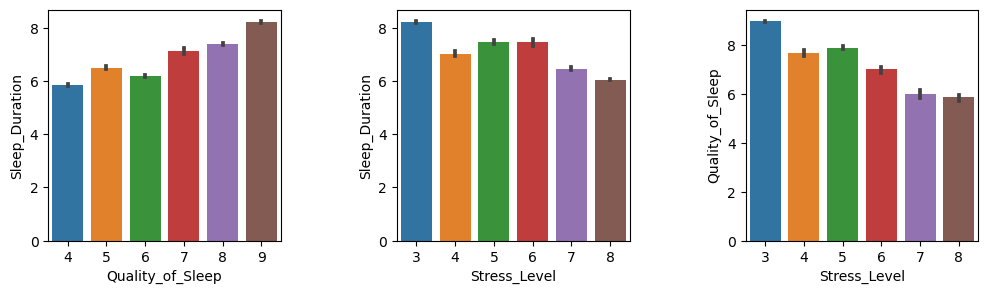

In [61]:
fig, ax = plt.subplots(1,3, figsize = (12,3))
plt.subplots_adjust(wspace = 0.5)

sns.barplot(data=sleep_df, x ='Quality_of_Sleep',y = 'Sleep_Duration', ax = ax[0])
sns.barplot(data=sleep_df, x ='Stress_Level',y = 'Sleep_Duration', ax = ax[1])
sns.barplot(data=sleep_df, x ='Stress_Level',y = 'Quality_of_Sleep', ax = ax[2])

### Conclusion number 2 - Stress
#### According to the data we were presented an increase in stress could very much cause a decline in the quality and duration of a person's sleep.

# Sleeping Disorders
#### We decided to check how the sleeping disorders effect the other parts of the data.

<div>
<img src="https://raw.githubusercontent.com/hhneuman/Data-Analisys/main/Sleep%20Disorder.jpg"/>
</div>

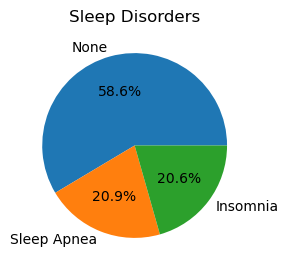

In [56]:
plt.figure(1, figsize=(3,3))
plt.title("Sleep Disorders")
sleep_df['Sleep_Disorder'].value_counts().plot.pie(autopct="%1.1f%%")
plt.ylabel("")
plt.show()

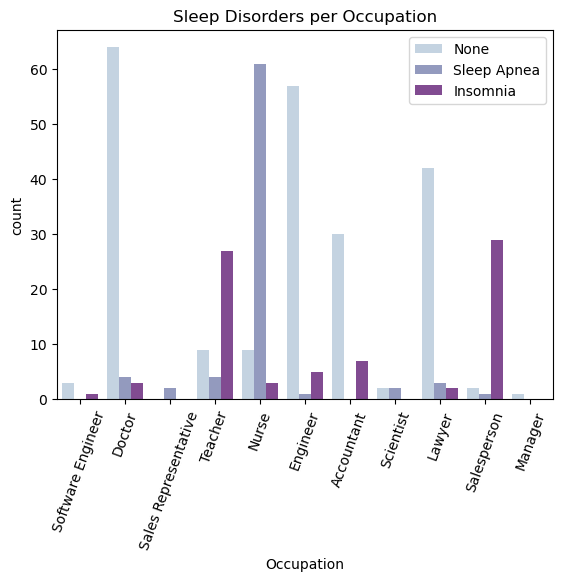

In [64]:
fig=sns.countplot(x="Occupation", data=sleep_df, hue = 'Sleep_Disorder', palette="BuPu")
plt.xticks(rotation=70)
fig.set_title("Sleep Disorders per Occupation")
plt.legend(title='', loc=('upper right')) 
plt.show()

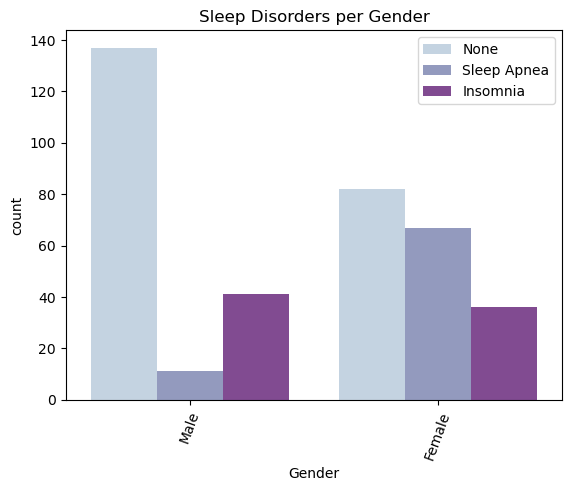

In [58]:
fig=sns.countplot(x="Gender", data=sleep_df, hue = 'Sleep_Disorder', palette="BuPu")
plt.xticks(rotation=70)
fig.set_title("Sleep Disorders per Gender")
plt.legend(title='', loc=('upper right')) 
plt.show()

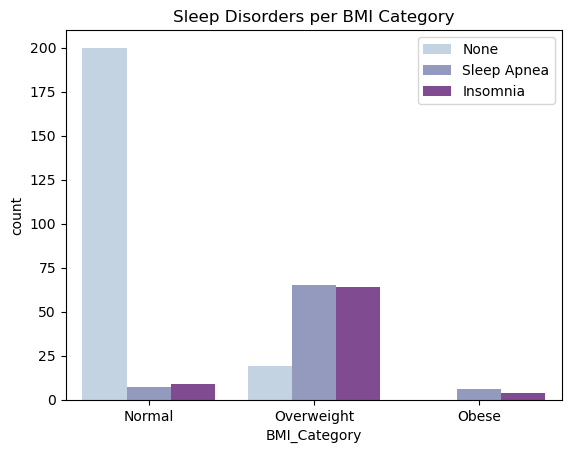

In [63]:
my_order2=['Normal','Overweight','Obese']
fig=sns.countplot(x="BMI_Category", data=sleep_df, hue = 'Sleep_Disorder', palette="BuPu",order=my_order2)
plt.xticks(rotation=0)
fig.set_title("Sleep Disorders per BMI Category")
plt.legend(title='', loc=('upper right')) 
plt.show()

## Conclusion number 1 - Sleeping Disorders
#### According to the data we were presented, a person's BMI, Gender and Occupation could increase the chance of a person having a sleeping disorder:
#### 1. Over 60% of women listed in the data reported experiencing some sort of a sleeping disorder in comparison to 30% of men.
#### 2. Over 70% of people who are over weight suffer from a sleeping disorder and 100% of people who suffer from obesity also suffer from a sleeping disorder.
#### 3. Some occupations report a abnormly high persent of sleeping disorders in comparison to other occupations.
### Sub Conclusion
#### If the data we were presended is accurate it could indicate that a very large portion of society suffers from a sleeping disorder to some extent.